#### CREATED BY: Jason Werenski
#### DATE: July 23, 2021
#### PROJECT: Problem Set 2, Client Question
#### PURPOSE: ClearView Life Sciences Data Analyst Interview 

## Patient Classifier for Rare Disease
The client has a product in development for a rare disease. This rare disease can be sub-categorized by its severity, but no guidelines exist to map inidividual patients to a severity level. The client has a database containing clinically-relevant information about the disease and the patient rating as either mild, moderate or severe.

You have been tasked with extracting simple rules to classify patients from the database. Each severity should have 1-3 rules.

In [1]:
# Importing Libraries
import pandas as pd                 # Data processing, and data I/O
import numpy as np                  # Linear Algebra
import matplotlib.pyplot as plt     # Data visualization
import seaborn as sns               # Statistical data visualization
import sklearn                      # ML Libraries


## Reading in the Dataset

In [3]:
# Data Import
disease_data = pd.read_csv("Mild Moderate Severe Data_Final.csv")

In [4]:
disease_data.head()

,Patient,Final Category,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps,Number of Symptoms
0,1,Mild,0,0,1,0,0,0,0,0,0,1
1,2,Mild,0,0,0,0,0,0,1,1,0,2
2,3,Mild,1,0,0,0,1,0,1,1,0,4
3,4,Mild,0,0,0,0,0,0,0,0,0,0
4,5,Mild,0,0,0,0,0,0,1,0,0,1


In [6]:
# Size of Data
disease_data.shape

(300, 12)

In [8]:
# Column Types
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient             300 non-null    int64 
 1   Final Category      300 non-null    object
 2   Fatigue             300 non-null    int64 
 3   Weakness            300 non-null    int64 
 4   Depression          300 non-null    int64 
 5   Anxiety             300 non-null    int64 
 6   Dry Skin            300 non-null    int64 
 7   Spasms              300 non-null    int64 
 8   Tingling            300 non-null    int64 
 9   Headaches           300 non-null    int64 
 10  Cramps              300 non-null    int64 
 11  Number of Symptoms  300 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 28.2+ KB


In [16]:
# Checks to see if there are equal Mild, Moderate, Severe patients
disease_data['Final Category'].value_counts()

Mild        100
Moderate    100
Severe      100
Name: Final Category, dtype: int64

#### Summary of Variables
* There are 9 varaibles in the dataset. All variables are categorical (0 = No, 1 = Yes).
* These are given by 'Fatigue', 'Weakness', 'Depression', 'Anxiety', 'Dry Skin', 'Spasms', 'Tingling', 'Headaches', and 'Cramps'
* 'Final Category' is the target variable. This variable can hold 1 of 3 values: 'Mild', 'Moderate', 'Severe'
* There are 300 observations, each 'Final Category' value is 1/3 of the 300 observations.

## Descriptive Statistics

#### Overall Data Description

In [21]:
disease_data.describe()

,Patient,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps,Number of Symptoms
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,0.466667,0.396667,0.356667,0.363333,0.366667,0.200000,0.323333,0.333333,0.213333,3.020000
std,86.746758,0.499721,0.490023,0.479816,0.481763,0.482700,0.400668,0.468530,0.472192,0.410346,1.703704
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,150.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,225.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000
max,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


#### 'Mild' Data Desciption

In [22]:
disease_data[disease_data['Final Category'] == 'Mild'].describe()

,Patient,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps,Number of Symptoms
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.00,100.000000,100.00000,100.00,100.000000
mean,50.500000,0.290000,0.190000,0.060000,0.15000,0.21000,0.01,0.250000,0.15000,0.01,1.320000
std,29.011492,0.456048,0.394277,0.238683,0.35887,0.40936,0.10,0.435194,0.35887,0.10,1.023758
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00000,0.00,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00000,0.00,1.000000
50%,50.500000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00000,0.00,1.000000
75%,75.250000,1.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.250000,0.00000,0.00,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00,1.000000,1.00000,1.00,5.000000


#### 'Moderate' Data Description

In [23]:
disease_data[disease_data['Final Category'] == 'Moderate'].describe()

,Patient,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps,Number of Symptoms
count,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,150.500000,0.540000,0.510000,0.610000,0.45,0.400000,0.030000,0.220000,0.380000,0.020000,3.16000
std,29.011492,0.500908,0.502418,0.490207,0.50,0.492366,0.171447,0.416333,0.487832,0.140705,0.72083
min,101.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,125.750000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000
50%,150.500000,1.000000,1.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000
75%,175.250000,1.000000,1.000000,1.000000,1.00,1.000000,0.000000,0.000000,1.000000,0.000000,3.00000
max,200.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,5.00000


#### 'Severe' Data Description

In [24]:
disease_data[disease_data['Final Category'] == 'Severe'].describe()

,Patient,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps,Number of Symptoms
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,250.500000,0.57000,0.490000,0.400000,0.490000,0.490000,0.560000,0.500000,0.470000,0.610000,4.580000
std,29.011492,0.49757,0.502418,0.492366,0.502418,0.502418,0.498888,0.502519,0.501614,0.490207,1.342243
min,201.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,225.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,250.500000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,1.000000,4.000000
75%,275.250000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.250000
max,300.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


#### My observations of Descriptive Statistics, by 'Final Category'
* 'Mild' number of symptoms < 'Moderate' number of symptoms < 'Severe' number of symptoms
* Cramps, Spasms occur infrequently in 'Mild', 'Moderate' cases 
* Fatigue, Weakness, Depression, Anxiety, Dry Skin commonly occur in 'Moderate', 'Severe' cases

## Data Correlation

#### Overall Data Correlation

In [27]:
disease_data.drop(['Patient', 'Number of Symptoms'], axis = 1).corr()

,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps
Fatigue,1.000000,0.115637,0.070672,0.001852,0.023109,-0.016704,0.039044,0.118114,0.018485
Weakness,0.115637,1.000000,0.050592,0.138317,0.033464,-0.047696,-0.065212,0.062635,0.010201
Depression,0.070672,0.050592,1.000000,0.074126,0.025511,0.062628,-0.038631,0.034444,0.019931
Anxiety,0.001852,0.138317,0.074126,1.000000,0.058007,0.072771,0.026028,0.098013,0.063386
Dry Skin,0.023109,0.033464,0.025511,0.058007,1.000000,0.121050,0.035985,0.063585,0.093431
Spasms,-0.016704,-0.047696,0.062628,0.072771,0.121050,1.000000,0.206664,0.123744,0.410909
Tingling,0.039044,-0.065212,-0.038631,0.026028,0.035985,0.206664,1.000000,0.040313,0.161896
Headaches,0.118114,0.062635,0.034444,0.098013,0.063585,0.123744,0.040313,1.000000,-0.005754
Cramps,0.018485,0.010201,0.019931,0.063386,0.093431,0.410909,0.161896,-0.005754,1.000000


#### 'Mild' Data Correlation

In [28]:
disease_data.drop(['Patient', 'Number of Symptoms'], axis = 1)[disease_data['Final Category'] == 'Mild'].corr()

,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps
Fatigue,1.000000,0.196055,0.024127,-0.206758,-0.004870,-0.064232,0.038171,0.040117,-0.064232
Weakness,0.196055,1.000000,0.092308,-0.060680,-0.061957,-0.048676,0.014717,0.082096,-0.048676
Depression,0.024127,0.092308,1.000000,0.011792,-0.130259,-0.025392,0.048622,0.129717,-0.025392
Anxiety,-0.206758,-0.060680,0.011792,1.000000,-0.147829,-0.042220,0.016169,-0.176471,-0.042220
Dry Skin,-0.004870,-0.061957,-0.130259,-0.147829,1.000000,-0.051818,0.099223,0.058444,-0.051818
Spasms,-0.064232,-0.048676,-0.025392,-0.042220,-0.051818,1.000000,-0.058026,-0.042220,-0.010101
Tingling,0.038171,0.014717,0.048622,0.016169,0.099223,-0.058026,1.000000,0.016169,0.174078
Headaches,0.040117,0.082096,0.129717,-0.176471,0.058444,-0.042220,0.016169,1.000000,-0.042220
Cramps,-0.064232,-0.048676,-0.025392,-0.042220,-0.051818,-0.010101,0.174078,-0.042220,1.000000


#### 'Moderate' Data Correlation

In [29]:
disease_data.drop(['Patient', 'Number of Symptoms'], axis = 1)[disease_data['Final Category'] == 'Moderate'].corr()

,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps
Fatigue,1.000000,-0.021674,0.002468,-0.173422,-0.065530,-0.190543,-0.091059,-0.145505,-0.154782
Weakness,-0.021674,1.000000,-0.168563,0.042220,-0.220498,-0.179416,-0.155494,-0.098086,-0.002858
Depression,0.002468,-0.168563,1.000000,-0.142179,-0.058590,-0.099755,-0.218759,-0.218799,0.114227
Anxiety,-0.173422,0.042220,-0.142179,1.000000,-0.082061,0.194424,-0.189242,0.078683,-0.129219
Dry Skin,-0.065530,-0.220498,-0.058590,-0.082061,1.000000,-0.023932,-0.187249,-0.050465,-0.116642
Spasms,-0.190543,-0.179416,-0.099755,0.194424,-0.023932,1.000000,-0.093398,-0.016908,-0.025123
Tingling,-0.091059,-0.155494,-0.218759,-0.189242,-0.187249,-0.093398,1.000000,-0.117372,-0.075869
Headaches,-0.145505,-0.098086,-0.218799,0.078683,-0.050465,-0.016908,-0.117372,1.000000,-0.111840
Cramps,-0.154782,-0.002858,0.114227,-0.129219,-0.116642,-0.025123,-0.075869,-0.111840,1.000000


#### 'Severe' Data Correlation

In [30]:
disease_data.drop(['Patient', 'Number of Symptoms'], axis = 1)[disease_data['Final Category'] == 'Severe'].corr()

,Fatigue,Weakness,Depression,Anxiety,Dry Skin,Spasms,Tingling,Headaches,Cramps
Fatigue,1.000000,0.002828,-0.115446,0.083640,-0.037578,-0.200204,0.060597,0.251323,-0.156125
Weakness,0.002828,1.000000,-0.106166,0.119648,0.159664,-0.259527,-0.140028,-0.001202,-0.200553
Depression,-0.115446,-0.106166,1.000000,-0.024500,-0.065333,0.065795,0.040825,-0.032719,-0.100440
Anxiety,0.083640,0.119648,-0.024500,1.000000,0.119648,-0.178928,0.100020,0.038878,-0.118527
Dry Skin,-0.037578,0.159664,-0.065333,0.119648,1.000000,0.022568,0.060012,-0.001202,-0.036501
Spasms,-0.200204,-0.259527,0.065795,-0.178928,0.022568,1.000000,0.120873,-0.012916,-0.047912
Tingling,0.060597,-0.140028,0.040825,0.100020,0.060012,0.120873,1.000000,0.060108,-0.061507
Headaches,0.251323,-0.001202,-0.032719,0.038878,-0.001202,-0.012916,0.060108,1.000000,-0.315073
Cramps,-0.156125,-0.200553,-0.100440,-0.118527,-0.036501,-0.047912,-0.061507,-0.315073,1.000000


#### My observations of Correlation, by Final Category
* No two variables appear to be strongly correlated
* The majority of varaibles are not correlated (r < 0.25) for all categories

## Data Visualizations

In [64]:
# Create new dataframe to describe data differently
df = pd.DataFrame(columns = ['Final Category', 'Symptom', 'Mean', 'StdDev'])
final_category = ['Mild', 'Moderate', 'Severe']
symptoms = ['Fatigue', 'Weakness', 'Depression ', 'Anxiety', 'Dry Skin', 'Spasms', 'Tingling', 'Headaches', 'Cramps']

for category in final_category:
    for symptom in symptoms:
        mean = disease_data[disease_data['Final Category'] == category][symptom].mean()
        stdev = disease_data[disease_data['Final Category'] == category][symptom].std()
        row_df = pd.DataFrame([[category, symptom, mean, stdev]], columns = ['Final Category', 'Symptom', 'Mean', 'StdDev'])
        df = df.append(row_df)


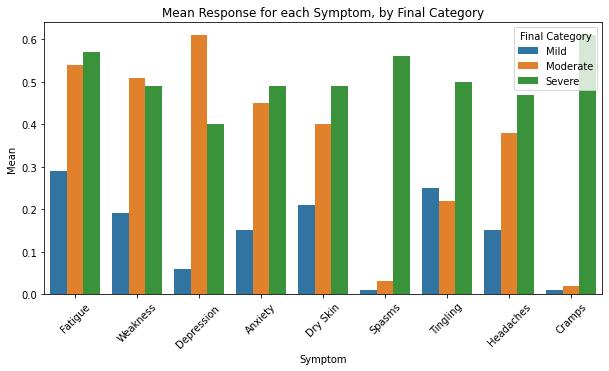

In [65]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x = "Symptom", y = "Mean", hue = "Final Category", data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Mean Response for each Symptom, by Final Category")
plt.show()

## Data Split into Train and Test Sets 

In [71]:
# Declares faeture vector and target variable
disease_data.rename(columns={'Depression ':'Depression'})
X = disease_data.drop(['Patient', 'Final Category'], axis=1)
y = disease_data['Final Category']

In [72]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

# Categorical Data already encoded as Yes/No to 1/0

## Decision Tree Classifier

In [76]:
# Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [94]:
# Instatiating and Fitting the Model
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### Predicting the Test Set

In [95]:
y_pred = dtc.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
print('DTC Model Accuracy Score on Test Set: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

DTC Model Accuracy Score on Test Set: 0.8283


## Checking for Overfitting between train and test sets

In [98]:
y_pred_train = dtc.predict(X_train)
print('DTC Model Accuracy Score on Train Set: {0:0.4f}'.format(accuracy_score(y_pred_train, y_train)))

DTC Model Accuracy Score on Train Set: 0.8607


#### My observation from Model Fitting
* Data is slightly over fitted 

## Visualizing the Decision Tree Classifier

In [99]:
from sklearn import tree

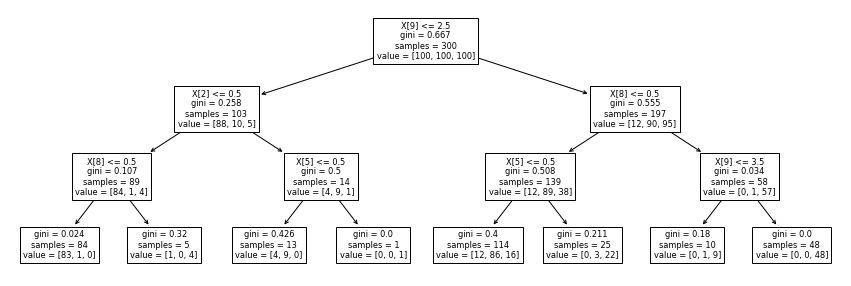

In [188]:
plt.figure(figsize=(15,5))
tree.plot_tree(dtc.fit(X, y))
plt.savefig('DTC.png')
plt.show()

#### Converted X[n] to column
* X[0] --> Fatigue
* X[1] --> Weakness
* X[2] --> Depression
* X[3] --> Anxiety
* X[4] --> Dry Skin
* X[5] --> Spasms
* X[6] --> Tingling
* X[7] --> Headaches
* X[8] --> Cramps
* X[9] --> Number of Symptoms

#### False Points Right, True Points Left

#### Values[x,y,z] --> Values[Mild,Moderate,Severe]

## RULES
Using the Decision Tree Classifier as a basis, I can extract individual rules for whether a not a patient is or is not a value of the Final Categories.

#### Mild Rule
If the Number of Symptoms is 2 or less, it is Mild

#### Moderate Rule
If the Number of Symptoms is greater than 2 AND there are no Cramps, it is moderate

#### Severe Rule
If the Number of Symptoms is 4 or more, it is severe



## Decision Tree Classifier & Rules Analysis: Confusion Matrix

For this, I will plot the confusion matrix for the decision tree classifier. Then I will create confusion matrices for each rule.

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [128]:
y_pred_all = dtc.predict(X)
confusion_matrix(y,y_pred_all)

array([[83, 16,  1],
       [ 1, 95,  4],
       [ 0, 16, 84]], dtype=int64)

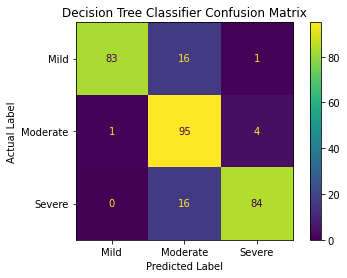

In [187]:
matrix = plot_confusion_matrix(dtc, X, y)
matrix.ax_.set_title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("overall_cm.png")
plt.show()

## Creating Functions for the different rules

In [166]:
# Mild Rule: If the number of symptoms is 2 or less, it is mild
def rule1(df):
    y_pred = []
    for idx, row in df.iterrows():
        if row['Number of Symptoms'] <= 2.5:
            y_pred.append('Mild')
        else:
            y_pred.append('Other')
    return y_pred

def for_mild(df):
    y = []
    for dx, row in df.iterrows():
        if row['Final Category'] == 'Mild':
            y.append('Mild')
        else:
            y.append('Other')
    return y

# Moderate Rule: If the number of symptoms is greater than 2 AND there are no cramps, it is moderate
def rule2(df):
    y_pred = []
    for idx, row in df.iterrows():
        if row['Number of Symptoms'] > 2.5 and row['Cramps'] == 0:
            y_pred.append('Moderate')
        else:
            y_pred.append('Other')
    return y_pred

def for_moderate(df):
    y = []
    for idx, row in df.iterrows():
        if row['Final Category'] == 'Moderate':
            y.append('Moderate')
        else:
            y.append('Other')
    return y

# Severe Rule: If the number of symptoms is 4 or more, it is Severe
def rule3(df):
    y_pred = []
    for idx, row in df.iterrows():
        if row['Number of Symptoms'] > 3.5:
            y_pred.append('Severe')
        else:
            y_pred.append('Other')
    return y_pred


def for_severe(df):
    y = []
    for idx, row in df.iterrows():
        if row['Final Category'] == 'Severe':
            y.append('Severe')
        else:
            y.append('Other')
    return y


In [167]:
# Rule 1 observed and predicted
y_obs_rule1 = for_mild(disease_data)
y_pred_rule1 = rule1(disease_data)

# Rule 2 observed and predicted
y_obs_rule2 = for_moderate(disease_data)
y_pred_rule2 = rule2(disease_data)

# Rule 3 observed and predicted
y_obs_rule3 = for_severe(disease_data)
y_pred_rule3 = rule3(disease_data)


In [162]:
from sklearn.utils.multiclass import unique_labels

In [169]:
# Create function to make confusion matrix

def plot_cm(y_obs, y_pred):
    labels = unique_labels(y_obs)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    cm = pd.DataFrame(confusion_matrix(y_obs, y_pred), columns = column, index = indices)
    return sns.heatmap(cm, annot=True, fmt='d',cmap='viridis')

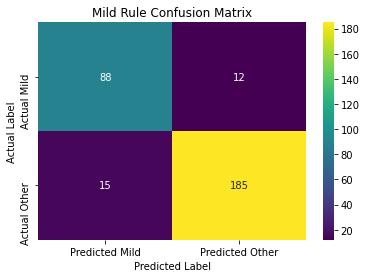

In [186]:
rule1_cm = plot_cm(y_obs_rule1, y_pred_rule1)
rule1_cm.set_title('Mild Rule Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("rule1_cm.png")
plt.show()

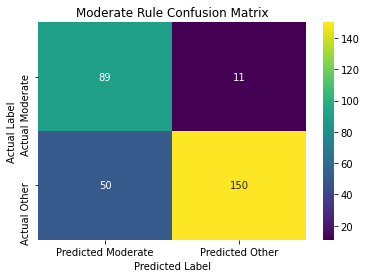

In [185]:
rule2_cm = plot_cm(y_obs_rule2, y_pred_rule2)
rule2_cm.set_title('Moderate Rule Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("rule2_cm.png")
plt.show()

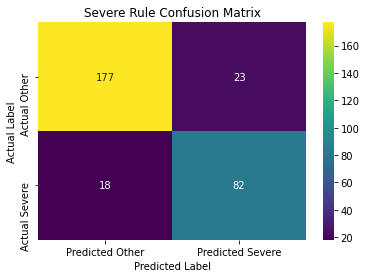

In [184]:
rule3_cm = plot_cm(y_obs_rule3, y_pred_rule3)
rule3_cm.set_title('Severe Rule Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("rule3_cm.png")
plt.show()

## Results and Conclusion

1. In this project, I used physician-collected patient data about a rare disease to predict a patient's disease severity based on the patient's symptoms using a Decision Tree Classifier.
2. The Decision Tree Classifier had an accuracy of 0.8283 on the test set and accuracy of 0.8607 on the train set.
3. The Decision Tree Classifier could be broken down into simple classification rules for each severity:
    * If the number of symptoms if two or less, the diagnosis is mild (accuracy = 0.9433)
    * If the number of symptoms is greater than two and the patient does not have cramps, the diagnosis is moderate (accuracy = 0.7967)
    * If the number of symptoms is four or more, the diagnosis is severe (accuracy = 0.8633)